In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sklearn
import pandas as p
import folium

In [2]:
os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis")

# analysis for the month of april
data_path = 'Uber-dataset/uber-raw-data-apr14.csv'
files = os.listdir(data_path)


In [22]:
os.chdir(data_path)
for file in files:
    data_april = p.read_csv(file)
os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis")


In [23]:
data_april.head(10)

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11  40.7690 -73.9549  B02512
1  4/1/2014 0:17  40.7267 -74.0345  B02512
2  4/1/2014 0:21  40.7316 -73.9873  B02512
3  4/1/2014 0:28  40.7588 -73.9776  B02512
4  4/1/2014 0:33  40.7594 -73.9722  B02512
5  4/1/2014 0:33  40.7383 -74.0403  B02512
6  4/1/2014 0:39  40.7223 -73.9887  B02512
7  4/1/2014 0:45  40.7620 -73.9790  B02512
8  4/1/2014 0:55  40.7524 -73.9960  B02512
9  4/1/2014 1:01  40.7575 -73.9846  B02512

In [24]:
data_april.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [25]:
date_time = data_april['Date/Time']
lat = data_april['Lat']
long = data_april['Lon']
base = data_april['Base']

unique_base = base.unique()
color = ['#9b59b6','#28b463','#f1c40f','#e67e22','#e74c3c']


# get the latitude and longitude points for all the base 
# take 1000 sample points for each base
new_data = []
for b in unique_base:
    value = []
    count = 0
    for d in data_april.values:
        if d[-1] == b :  
            new_data.append(d)
            value.append(d)
            count+=1
            if count == 1000: break
    print(len(value))

print(len(new_data))
print(new_data[0])

1000
1000
1000
1000
1000
5000
['4/1/2014 0:11' 40.769 -73.9549 'B02512']


In [26]:
# maps 
m = folium.Map(location=[new_data[0][1],new_data[0][2]],tiles='Stamen Toner')
for d in new_data:
    clr = color[np.where(unique_base==d[-1])[0][0]]
    folium.CircleMarker(location=[d[1],d[2]],
                    radius=2,
                    popup=d[-1],
                    color=clr,
                    fill=True,
                    fill_color=clr
                    ).add_to(m)
m

In [27]:
# get total number of trips for each base
trip_count = []
for b in unique_base:
    count = 0
    for d in data_april.values:
        if d[-1] == b :
            count+=1
    trip_count.append(count)
    print(f"Base:{b}, trip_count:{count}")

Base:B02512, trip_count:35536
Base:B02598, trip_count:183263
Base:B02617, trip_count:108001
Base:B02682, trip_count:227808
Base:B02764, trip_count:9908


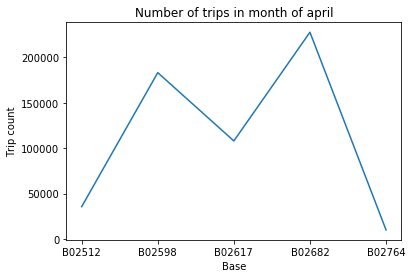

In [28]:
plt.plot(unique_base,trip_count)
plt.xlabel('Base')
plt.ylabel('Trip count')
plt.title('Number of trips in month of april')
plt.show()

In [16]:
# get the stats from all months
os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis")
print(f"data files:{os.listdir('Uber-dataset')}")
data = []
month = []

for file in os.listdir('Uber-dataset'):
    os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis\Uber-dataset")
    if not file.split('.')[-1] == 'zip':
        os.chdir(file)
        data.append(p.read_csv(file))
        month.append(file.split('-')[-1].split('.')[0].split('1')[0])
os.chdir(r"D:\University files\2020-2021\1b\Machine Learning\Project\Uber-data-analysis")
print(f"Months : {month}")

data files:['uber-raw-data-apr14.csv', 'uber-raw-data-apr14.csv.zip', 'uber-raw-data-aug14.csv', 'uber-raw-data-aug14.csv.zip', 'uber-raw-data-jul14.csv', 'uber-raw-data-jul14.csv.zip', 'uber-raw-data-jun14.csv', 'uber-raw-data-jun14.csv.zip', 'uber-raw-data-may14.csv', 'uber-raw-data-may14.csv.zip', 'uber-raw-data-sep14.csv', 'uber-raw-data-sep14.csv.zip']
Months : ['apr', 'aug', 'jul', 'jun', 'may', 'sep']


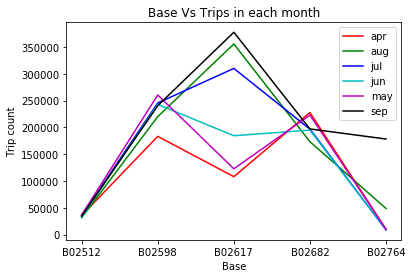

In [38]:
# trips and base in each month
total_trips = []
color = ['r','g','b','c','m','k']
for d in data:
    trip_count = []
    for b in unique_base:
        count = 0
        for value in d.values:
            if value[-1] == b :
                count+=1
        trip_count.append(count)
    total_trips.append(trip_count)

for trip in range(len(total_trips)):
    plt.plot(unique_base,total_trips[trip],color=color[trip])

plt.xlabel('Base')
plt.ylabel('Trip count')
plt.legend(month)
plt.title('Base Vs Trips in each month')
plt.show()

In [103]:
# analysis of each months on date scale 
print(f"Months : {month}")
for m in month:
    print(f"Current instance : {m}")
    curr_month = data[month.index(m)]
    curr_date_time = curr_month['Date/Time']
    #curr_date_time = curr_date_time.iloc
    curr_date = np.array([int(curr_date_time[key].split('/')[1]) for key,value in curr_date_time.items()])
    curr_date_unique = np.unique(curr_date)
    curr_date_unique = np.sort(curr_date_unique)
    print(curr_date_unique)
    data_date = {}
    for j in curr_date_unique:
        print(f"current_date : {j}")
        tmp_list = []
        index_list = []
        for base in unique_base:
            count = 0
            index = []
            for i in range(len(curr_date)):
                if j == curr_date[i]:
                    if curr_month['Base'].loc[i] == base:
                        count+=1
                        index.append(i)
                   #print(f"current date : {curr_date[i]} ; Base : {curr_month['Base'].loc[i]}")
            tmp_list.append(count)
            index_list.append(index)
        data_date[j]=[tmp_list,index_list]
        
    #    print(curr_month['Base'].iloc[int(curr_date[0])])
    print(data_date.keys())
    break


Months : ['apr', 'aug', 'jul', 'jun', 'may', 'sep']
Current instance : apr
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
current_date : 1
current_date : 2
current_date : 3
current_date : 4
current_date : 5
current_date : 6
current_date : 7
current_date : 8
current_date : 9
current_date : 10
current_date : 11
current_date : 12
current_date : 13
current_date : 14
current_date : 15
current_date : 16
current_date : 17
current_date : 18
current_date : 19
current_date : 20
current_date : 21
current_date : 22
current_date : 23
current_date : 24
current_date : 25
current_date : 26
current_date : 27
current_date : 28
current_date : 29
current_date : 30
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


[1011, 3738, 3219, 6255, 323]
[1336, 4526, 3752, 7515, 345]
[1482, 5499, 4254, 9061, 405]
[1827, 7151, 5387, 11865, 484]
[1309, 5508, 3691, 8640, 373]
[820, 3828, 2747, 5840, 210]
[1376, 5336, 4009, 8537, 292]
[1023, 4781, 3345, 6763, 276]
[1167, 4812, 3439, 7100, 325]
[1274, 6061, 3974, 8360, 372]
[1362, 6213, 4075, 8452, 318]
[1087, 5908, 3302, 7505, 368]
[783, 3803, 2316, 5000, 210]
[854, 3889, 2460, 5228, 243]
[1391, 6327, 4135, 8460, 328]
[1059, 5727, 3500, 7139, 292]
[1343, 6948, 4013, 8305, 364]
[953, 6154, 3328, 7289, 350]
[851, 5082, 2645, 5775, 249]
[615, 3674, 1985, 4498, 245]
[744, 4592, 2354, 5258, 214]
[959, 6015, 3115, 6612, 274]
[1196, 7288, 3771, 7740, 351]
[1394, 8232, 4375, 8938, 413]
[1410, 9356, 4505, 9462, 362]
[1418, 9468, 4184, 9410, 445]
[848, 5595, 2660, 5335, 239]
[971, 5753, 2714, 5791, 246]
[1487, 8515, 4099, 8348, 386]
[2186, 13484, 6648, 13327, 606]


ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

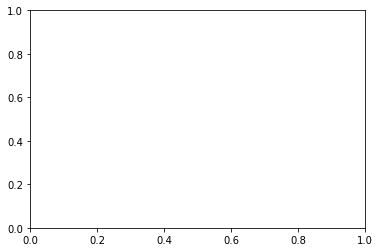

In [109]:
for key,value in data_date.items():
    print(value[0])
# plot --> days vs trip counts 
fig = plt.figure()
plt.plot(curr_date_unique,data_date)

In [178]:
# Linear regression
y = [month.index(m) for m in month]
print(y)
linear_model = sklearn.linear_model.LinearRegression(normalize=True)
linear_model.fit(total_trips,y)
linear_model.score(total_trips,y)

linear_model.predict(6)

ValueError: Expected 2D array, got scalar array instead:
array=6.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.